# Programs

Esta tabla contiene la información a nivel de programa. Es decir, contiene el porcentaje de clases definidas en el programa, el porcentaje de interfaces y el porcentaje de enumerados. También podemos encontrar otros dos campos que nos indican si el código está en el paquete por defecto o si hay código otros paquetes.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
from notebooks_utils import *
import psycopg2
import sqlalchemy

db_connection = sqlalchemy.create_engine(DB_CONNECTION_STR)

sql_query = open(file='./queries/programs.sql', mode='r').read()
full_table = pd.read_sql_query(sql=sql_query, con=db_connection)

# Table name, features and target.
TABLE_NAME = 'programs'
TABLE_FEATURES = ['program__has_sub_dirs_with_code','program__has_packages','program__number_of_modules','program__number_of_sub_dirs_with_code','program__number_of_packages','program__class_defs_pct','program__function_defs_pct','program__enum_defs_pct','program__has_code_root_package','program__average_defs_per_module','program__expertise_level']
TABLE_TARGET = 'program__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (1609, 11)
Target shape: (1609,)
As we can see the downloaded data contains a total of 1609 instances. Each of the instances corresponds to a program. For each program we have 11 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   program__has_sub_dirs_with_code        1609 non-null   bool   
 1   program__has_packages                  1609 non-null   bool   
 2   program__number_of_modules             1609 non-null   int64  
 3   program__number_of_sub_dirs_with_code  1609 non-null   int64  
 4   program__number_of_packages            1609 non-null   int64  
 5   program__class_defs_pct                1609 non-null   float64
 6   program__function_defs_pct             1609 non-null   float64
 7   program__enum_defs_pct                 1609 non-null   float64
 8   program__has_code_root_package         1609 non-null   bool   
 9   program__average_defs_per_module       1609 non-null   float64
 10  program__expertise_level               1609 non-null   object 
dtypes: b

Cómo podemos ver la tabla está compuesta por ocho variables numéricas, tres variables boleanas y una de tipo objeto. Esta última variable es la clase con la que se ha etiquetado la instancia. Sin embargo, en algunas ocasiones esta última clase no la vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 98.88% instances for BEGINNER class and 1.119% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [9]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [87.69%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [10]:
X.isnull().sum()

program__has_sub_dirs_with_code          0
program__has_packages                    0
program__number_of_modules               0
program__number_of_sub_dirs_with_code    0
program__number_of_packages              0
program__class_defs_pct                  0
program__function_defs_pct               0
program__enum_defs_pct                   0
program__has_code_root_package           0
program__average_defs_per_module         0
program__expertise_level                 0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [6]:
print_empty_cols(X)

program__has_sub_dirs_with_code
-------------------------------
0 instancias no tienen un valor para la columna program__has_sub_dirs_with_code


program__has_packages
---------------------
0 instancias no tienen un valor para la columna program__has_packages


program__number_of_modules
--------------------------
0 instancias no tienen un valor para la columna program__number_of_modules


program__number_of_sub_dirs_with_code
-------------------------------------
0 instancias no tienen un valor para la columna program__number_of_sub_dirs_with_code


program__number_of_packages
---------------------------
0 instancias no tienen un valor para la columna program__number_of_packages


program__class_defs_pct
-----------------------
0 instancias no tienen un valor para la columna program__class_defs_pct


program__function_defs_pct
--------------------------
0 instancias no tienen un valor para la columna program__function_defs_pct


program__enum_defs_pct
----------------------
0 instanci

### 2.4 - Describimos los valores de las variables de la tabla.

In [11]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
program__has_sub_dirs_with_code,1609,2,False,1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__has_packages,1609,2,False,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__number_of_modules,1609.0,NaN,NaN,NaN,11.327533,125.3427,1.0,1.0,3.0,3.0,3294.0
program__number_of_sub_dirs_with_code,1609.0,NaN,NaN,NaN,0.394034,6.886436,0.0,0.0,0.0,0.0,238.0
program__number_of_packages,1609.0,NaN,NaN,NaN,1.642014,34.308121,0.0,0.0,0.0,0.0,1297.0
program__class_defs_pct,1609.0,NaN,NaN,NaN,0.011369,0.078807,0.0,0.0,0.0,0.0,1.0
program__function_defs_pct,1609.0,NaN,NaN,NaN,0.650481,0.47164,0.0,0.0,1.0,1.0,1.0
program__enum_defs_pct,1609.0,NaN,NaN,NaN,0.000052,0.000781,0.0,0.0,0.0,0.0,0.019078
program__has_code_root_package,1609,2,True,1361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program__average_defs_per_module,1609.0,NaN,NaN,NaN,1.80408,2.950492,0.0,0.0,0.666667,2.142857,26.0


In [14]:
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X, ['program__has_sub_dirs_with_code'], 10))
print(get_statistics(X, ['program__number_of_modules'], 10))
print(get_statistics(X, ['program__class_defs_pct'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X, ['program__has_sub_dirs_with_code', 'program__number_of_modules'], 10))
print(get_statistics(X, ['program__has_sub_dirs_with_code', 'program__class_defs_pct'], 10))
print(get_statistics(X, ['program__number_of_modules', 'program__class_defs_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X, ['program__has_sub_dirs_with_code', 'program__number_of_modules', 'program__class_defs_pct'], 10))

--- SINGLE FEATURE ---
 program__has_sub_dirs_with_code  count  percentage
                             0.0   1558   96.830329
                             1.0     51    3.169671

 program__number_of_modules  count  percentage
                        3.0    609   37.849596
                        1.0    573   35.612181
                        2.0    201   12.492231
                        4.0    100    6.215040
                        5.0     34    2.113114
                        6.0     28    1.740211
                        7.0     20    1.243008
                        8.0     11    0.683654
                       10.0      3    0.186451
                       14.0      3    0.186451

 program__class_defs_pct  count  percentage
                0.000000   1560   96.954630
                0.111111      4    0.248602
                0.187500      3    0.186451
                0.045455      3    0.186451
                1.000000      3    0.186451
                0.365667      2    0.1

### 2.5 - Relacion entre variables
#### Normalizacion de tipos de datos
Primero nos aseguraremos de que nuestros datos contengan el mismo tipo de datos en cada columna. Para ello, aplicaremos codificación one-hot para que las características categóricas se transformen en columnas booleanas y luego transformaremos cada columna al tipo de datos float32

In [12]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (1609, 12)
Target shape: (1609,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

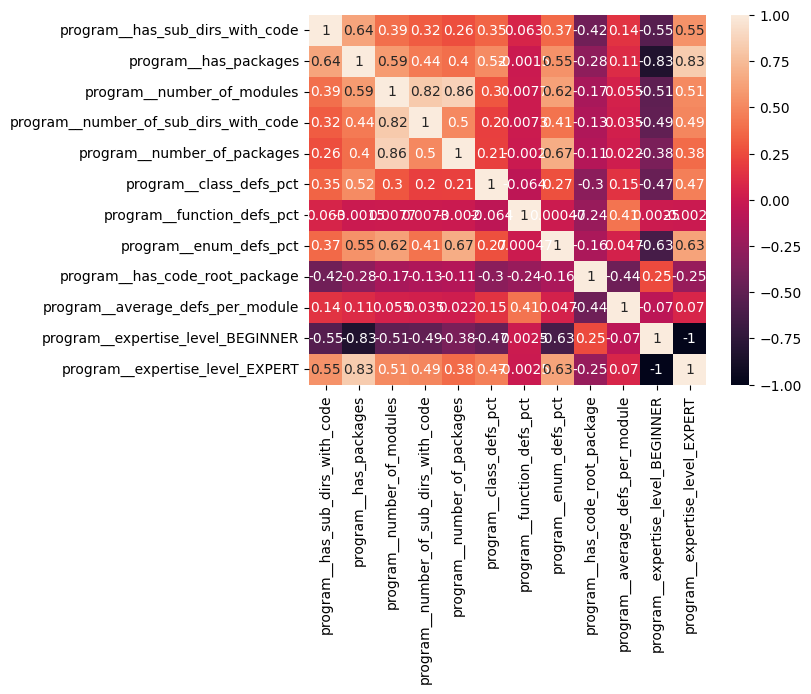

In [13]:
sns.heatmap(X.corr(), annot=True)

--> ABEL COMPLETAR <-- De la matriz anterior ya podemos sacar alguna conclusión que puede parecer obvia. Por ejemplo podemos secir que cuantas más interfaces tiene un programa menos clases va a tener. Y, lo mismo se aplica a las variables que representan si el código está en paquetes o no.

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

### Variable has_sub_dirs_with_code
Esta variable es de tipo booleano y representa si el programa contiene algún subdirectorio con código. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: ylabel='program__has_sub_dirs_with_code'>

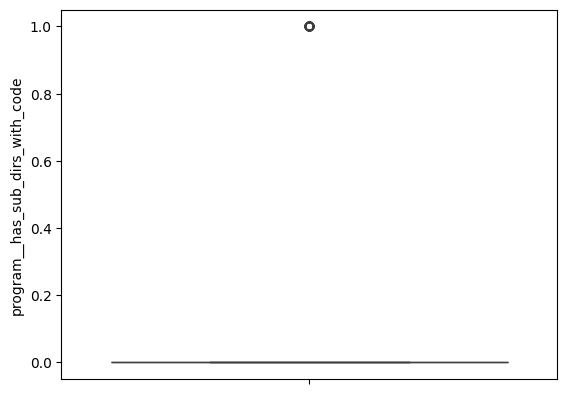

In [10]:
sns.boxplot(X['program__has_sub_dirs_with_code'])

Sabemos que la variable representa un valor boleano, 0 = false y 1 = verdadero. En la gráfica y a simple vista parece que tenemos muchas mas instancias de un tipo que del otro, lo cual podría ser extraño. Así que vamos a hacer un análisis numérico en detalle que nos ayude a descubrir qué está pasando.

In [11]:
num_true_values = len(X[X['program__has_sub_dirs_with_code'] == True])
num_false_values = len(X[X['program__has_sub_dirs_with_code'] == False])
std = X['program__has_sub_dirs_with_code'].std()
freq_true = len(X[X['program__has_sub_dirs_with_code'] == True]) / len(X['program__has_sub_dirs_with_code'])
freq_false = len(X[X['program__has_sub_dirs_with_code'] == False]) / len(X['program__has_sub_dirs_with_code'])
print(f'La variable has_sub_dirs_with_code contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es {freq_false}.')

La variable has_sub_dirs_with_code contiene 51 valores verdaderos y 1558 valores falsos. Y, la desviación típica es de 0.17524586617946625
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a True es 0.031696706028589185.
La frecuencia con la que programa puede tener la variable has_sub_dirs_with_code a False es 0.9683032939714108.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'program__has_sub_dirs_with_code', possible_values)

La variable program__has_sub_dirs_with_code contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable program__has_sub_dirs_with_code toma el valor de 0.0 en un 96.83% de los items.
La variable program__has_sub_dirs_with_code toma el valor de 1.0 en un 3.17% de los items.


Describimos los valores de las variables de la tabla, cuando la variable tiene el valor a True.

In [13]:
X[X['program__has_sub_dirs_with_code'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module,program__expertise_level_BEGINNER,program__expertise_level_EXPERT
count,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000
mean,1.0,0.431373,282.568634,12.431373,51.607841,0.164255,0.814500,0.001638,0.0,4.124859,0.666667,0.333333
std,0.0,0.500196,653.941162,37.047134,187.675156,0.195925,0.227913,0.004116,0.0,3.806759,0.476095,0.476095
min,1.0,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.0,0.000000,3.000000,1.000000,0.000000,0.000000,0.633807,0.000000,0.0,1.000000,0.000000,0.000000
50%,1.0,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,3.155406,1.000000,0.000000
75%,1.0,1.000000,392.500000,4.000000,44.000000,0.365667,1.000000,0.000000,0.0,5.775416,1.000000,1.000000
max,1.0,1.000000,3294.000000,238.000000,1297.000000,0.624539,1.000000,0.019078,0.0,17.000000,1.000000,1.000000


Esto nos confirma que tenemos casi todos los programas con esta variable a false. Una posible hipótesis es que --> ABEL COMPLETAR <--

### Variable has_packages
Esta variable es de tipo booleano y representa si el programa contiene algún paquete. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

--> ABEL COMPLETAR <-- Esta me la salto porque es igual que la anterior, seria hacer lo mismo que en la anterior.

### Variable number_of_modules
Esta variable es de tipo numérica y nos indica el número de modulos definidos en el programa. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 3294. Con una media de 11,3.

<Axes: ylabel='program__number_of_modules'>

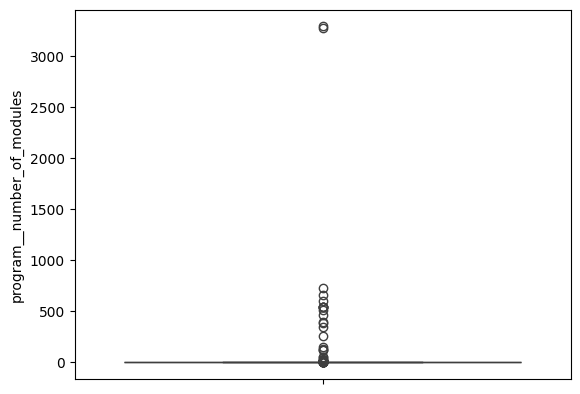

In [14]:
sns.boxplot(X['program__number_of_modules'])

In [15]:
print_outliers_for_df_column(X, 'program__number_of_modules')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9621331795279673
Rango valores atípicos extremos (Tukey): [-5.0,9.0]
Rango valores atípicos leves (Tukey): [-2.0,6.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.8965693397098071,143.772485167085]
fuyuuuuu -5.0
-3.0IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -5.0 (Q1-3*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__number_of_modules inferior a -2.0 (Q1-1.5*IQR) para program__number_of_modules. Representando un 0.0% del total de instancias.
+1.5IQR: 64 instancias tienen un valor para program__number_of_modules superior a 6.0 (Q3+1.5*IQR) para program__number_of_modules. Representando un 3.978% del total de instancias.
+3.0IQR: 33 instancias tienen un valor para program__number_of_modules superior a 9.0 (Q3-3*IQR) para program__number_of_modules. Representando un 2.051% del total de instancias.
L: 0 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 9 (Tukey rango extremo)

In [16]:
X[X['program__number_of_modules'] > 9.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module,program__expertise_level_BEGINNER,program__expertise_level_EXPERT
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.757576,0.696970,438.121216,18.363636,80.060608,0.261645,0.735824,0.002531,0.121212,4.421386,0.454545,0.545455
std,0.435194,0.466694,773.042969,45.189060,229.504227,0.190358,0.191416,0.004914,0.331434,3.108916,0.505650,0.505650
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.375461,0.000000,0.000000,0.733333,0.000000,0.000000
25%,1.000000,0.000000,22.000000,1.000000,0.000000,0.000000,0.617599,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,148.000000,3.000000,11.000000,0.316770,0.678571,0.000000,0.000000,4.451495,0.000000,1.000000
75%,1.000000,1.000000,541.000000,8.000000,73.000000,0.368945,1.000000,0.003165,0.000000,5.774492,1.000000,1.000000
max,1.000000,1.000000,3294.000000,238.000000,1297.000000,0.624539,1.000000,0.019078,1.000000,16.700001,1.000000,1.000000


### Variable class_defs_pct
Esta variable representa el porcentage de las definiciones de un programa que son clases. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 100. Con una media de 1,1%.

Vamos a usar una gráfica de tipo caja para ver qué valores se quedan dentro y fuera del IQR.

<Axes: ylabel='program__class_defs_pct'>

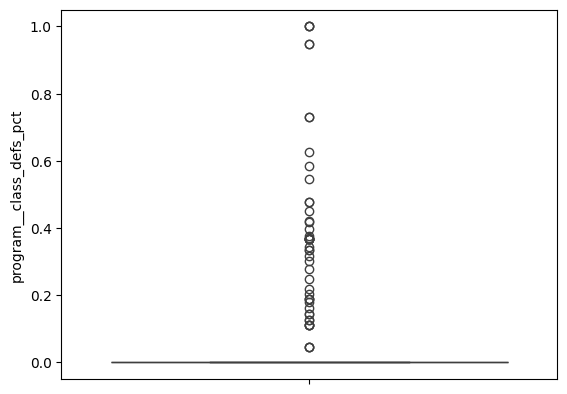

In [17]:
sns.boxplot(X['program__class_defs_pct'])

In [18]:
print_outliers_for_df_column(X, 'program__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9221834036634641
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
fuyuuuuu 0.0
-3.0IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.0 (Q1-3*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para program__class_defs_pct inferior a 0.0 (Q1-1.5*IQR) para program__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 49 instancias tienen un valor para program__class_defs_pct superior a 0.0 (Q3+1.5*IQR) para program__class_defs_pct. Representando un 3.045% del total de instancias.
+3.0IQR: 49 instancias tienen un valor para program__class_defs_pct superior a 0.0 (Q3-3*IQR) para program__class_defs_pct. Representando un 3.045% del total de instancias.
L: 0 instancias tienen un valor para program__class_defs_pct i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 9 (Tukey rango extremo)

## Multivariate

TODO: isolation forest algorithm

In [19]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012

isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.to_numpy())
mask = isof_prediction == -1
multivar_outliers = X[mask].index.tolist()
full_table.iloc[multivar_outliers]

,program__program_id,program__has_sub_dirs_with_code,program__has_packages,program__number_of_modules,program__number_of_sub_dirs_with_code,program__number_of_packages,program__class_defs_pct,program__function_defs_pct,program__enum_defs_pct,program__has_code_root_package,program__average_defs_per_module,program__expertise_level
2,560766,True,True,3278,238,380,0.248424,0.746025,0.005551,False,4.451495,EXPERT
3,2356327,True,True,3294,68,1297,0.368945,0.611977,0.019078,False,1.829994,EXPERT
